**Loading libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

**Loading Data from csv_file**

In [3]:
df = pd.read_csv("/content/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42186,2011-05-02,Wollongong,13.6,19.2,0.0,NaN,NaN,WSW,17.0,SW,...,69.0,1016.8,1014.9,NaN,8.0,18.2,19.0,No,0.4,No
42187,2011-05-03,Wollongong,14.7,18.7,0.4,NaN,NaN,SSW,52.0,SW,...,68.0,NaN,NaN,8.0,8.0,15.9,17.9,No,0.0,No
42188,2011-05-04,Wollongong,14.6,19.3,0.0,NaN,NaN,SSW,39.0,SSW,...,63.0,NaN,1016.0,NaN,NaN,16.9,18.9,No,0.0,No
42189,2011-05-05,Wollongong,13.3,17.3,0.0,NaN,NaN,S,56.0,SSW,...,60.0,1022.1,1022.5,NaN,8.0,15.9,16.5,No,0.0,No


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42191 entries, 0 to 42190
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           42191 non-null  object 
 1   Location       42191 non-null  object 
 2   MinTemp        41830 non-null  float64
 3   MaxTemp        42001 non-null  float64
 4   Rainfall       41617 non-null  float64
 5   Evaporation    21912 non-null  float64
 6   Sunshine       16900 non-null  float64
 7   WindGustDir    37477 non-null  object 
 8   WindGustSpeed  37481 non-null  float64
 9   WindDir9am     37720 non-null  object 
 10  WindDir3pm     40240 non-null  object 
 11  WindSpeed9am   41517 non-null  float64
 12  WindSpeed3pm   40886 non-null  float64
 13  Humidity9am    41660 non-null  float64
 14  Humidity3pm    40998 non-null  float64
 15  Pressure9am    35739 non-null  float64
 16  Pressure3pm    35748 non-null  float64
 17  Cloud9am       25736 non-null  float64
 18  Cloud3

Date                 0
Location             0
MinTemp            361
MaxTemp            190
Rainfall           574
Evaporation      20279
Sunshine         25291
WindGustDir       4714
WindGustSpeed     4710
WindDir9am        4471
WindDir3pm        1951
WindSpeed9am       674
WindSpeed3pm      1305
Humidity9am        531
Humidity3pm       1193
Pressure9am       6452
Pressure3pm       6443
Cloud9am         16455
Cloud3pm         16756
Temp9am            305
Temp3pm            969
RainToday          575
RISK_MM              1
RainTomorrow         1
dtype: int64

**DATA VISUALISATION AND CLEANING**
---Count plot of target column
---Correlation amongst numeric attributes
---Parse Dates into datetime
---Encoding days and months as continuous cyclic features

<Axes: xlabel='RainTomorrow', ylabel='count'>

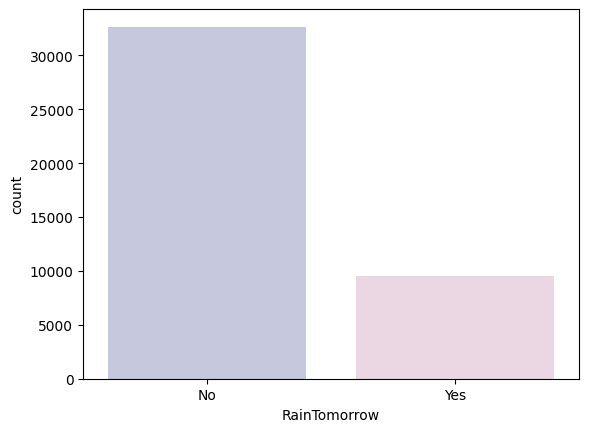

In [5]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= df["RainTomorrow"], palette= cols)

In [6]:
df['RainTomorrow'].value_counts()

No     32658
Yes     9532
Name: RainTomorrow, dtype: int64

our data is imbalanced

<ipython-input-9-f92a75a6425e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True ,square = True, cmap = "coolwarm")


<Axes: >

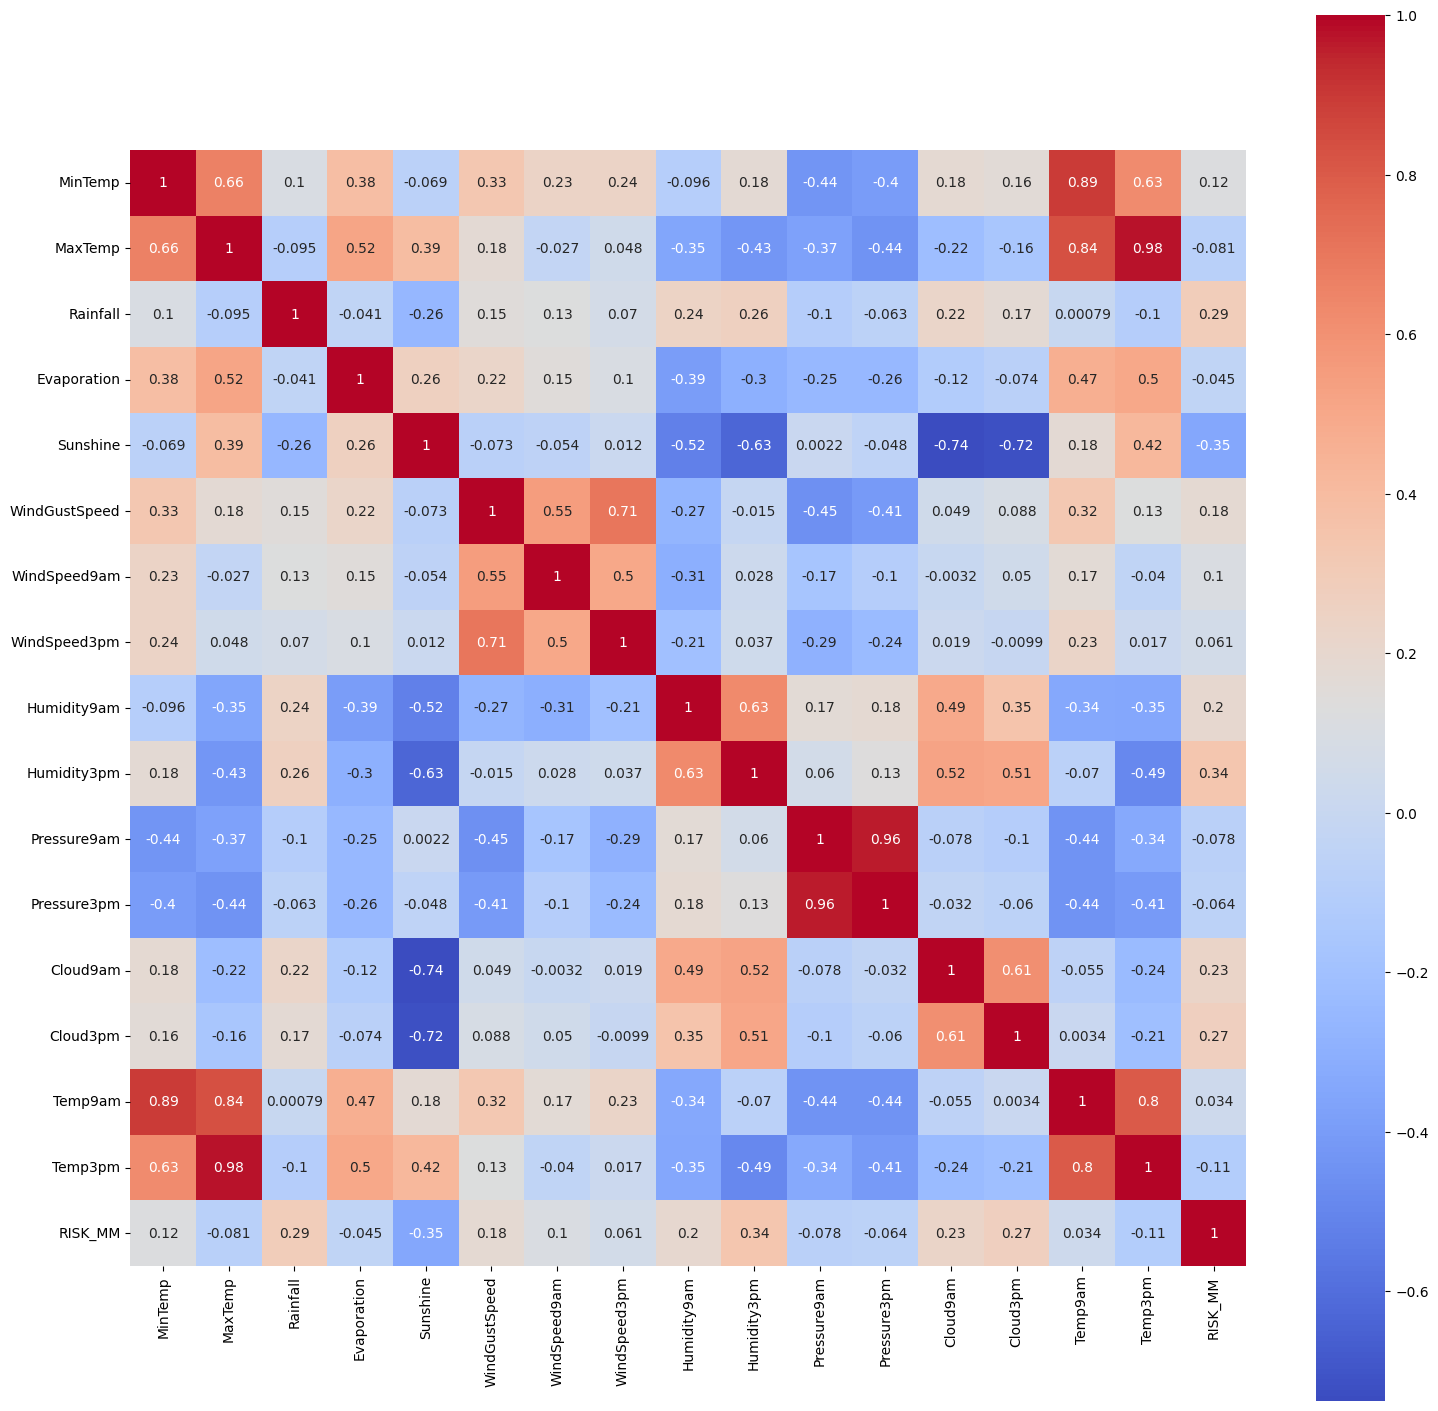

In [9]:
plt.figure(figsize=(18,18))
#cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
sns.heatmap(data = df.corr(), annot = True ,square = True, cmap = "coolwarm")

Cyclical Nature of Time: Dates and times have a cyclical nature because they repeat in a continuous cycle.  For example, after December comes January, and after Sunday comes Monday. However, traditional numerical
encoding (e.g., using numbers 1-12 for months) may not effectively capture this cyclical relationship.

Splitting into Subsections: To represent the cyclical nature of dates, they are split into periodic subsections.  For example, a date can be split into years, months, and days. Each subsection represents a repeating cycle within the date.


Sine and Cosine Transforms: To encode these subsections, two new features are created for each subsection: the
ine transform and the cosine transform. These transforms map the subsection values onto a unit circle. By doing
so, they preserve the cyclical relationship of the data.

Capturing Cyclical Patterns: The reason for using both sine and cosine transforms is to capture different aspects
of the cyclical patterns. The sine transform represents the vertical position on the unit circle, while the cosine
transform represents the horizontal position. Combining both transforms helps the ANN model understand the cyclical
patterns more effectively.

By encoding dates using sine and cosine transforms, the ANN can learn and recognize the cyclical patterns within
the data more accurately. This encoding technique allows the model to capture the relationships between different  dates and times in a way that aligns with their inherent cyclical nature.

In [10]:
#Parsing datetime
#exploring the length of date objects
lengths = df["Date"].str.len()
lengths.value_counts()




10    42191
Name: Date, dtype: int64

Splitting months and days into sine and cosine combinations in the context of building an artificial neural network (ANN) is a technique to represent the cyclical nature of time features in a continuous manner. Here's the meaning behind it:

Cyclical Nature of Months and Days: Months and days in a calendar year have a cyclical pattern. For example, after December comes January, and after Sunday comes Monday. Traditional numerical encoding (e.g., using numbers 1-12 for months) may not adequately capture this cyclical relationship.

Sine and Cosine Transform: To represent the cyclical nature of months and days as continuous features, a sine and cosine transform is applied to each. These transforms map the values onto a unit circle.

Continuous Encoding: By using the sine and cosine transforms, the cyclical features (months and days) are encoded as continuous variables that smoothly vary between -1 and 1. This continuous encoding allows the ANN to learn and understand the cyclical patterns more effectively.

Combination of Sine and Cosine: Both the sine and cosine functions are used to capture different aspects of the cyclical patterns. The sine function represents the vertical position on the unit circle, while the cosine function represents the horizontal position. Combining these two functions provides a more comprehensive representation of the cyclical nature of time.

By splitting months and days into sine and cosine combinations, the ANN model can effectively capture the cyclical patterns and relationships in time data. The continuous encoding allows the model to learn and make predictions based on the inherent cyclical nature of months and days, improving its ability to understand and generalize patterns within time series data.








In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day


#creating function for encoding the datetime into cyclic parameters using sin and cos transform
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature.

def encode(df, col, max_val):
  df[col + '_sin'] = np.sin(2*np.pi*df[col]/max_val)
  df[col +'_cos'] = np.cos(2*np.pi*df[col]/max_val)
  return df

encode(df, 'day', 31)
encode(df, 'month', 12)

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RISK_MM,RainTomorrow,year,month,day,day_sin,day_cos,month_sin,month_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,No,0.0,No,2008,12,1,0.201299,0.979530,-2.449294e-16,1.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,No,0.0,No,2008,12,2,0.394356,0.918958,-2.449294e-16,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,No,0.0,No,2008,12,3,0.571268,0.820763,-2.449294e-16,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,No,1.0,No,2008,12,4,0.724793,0.688967,-2.449294e-16,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,No,0.2,No,2008,12,5,0.848644,0.528964,-2.449294e-16,1.0


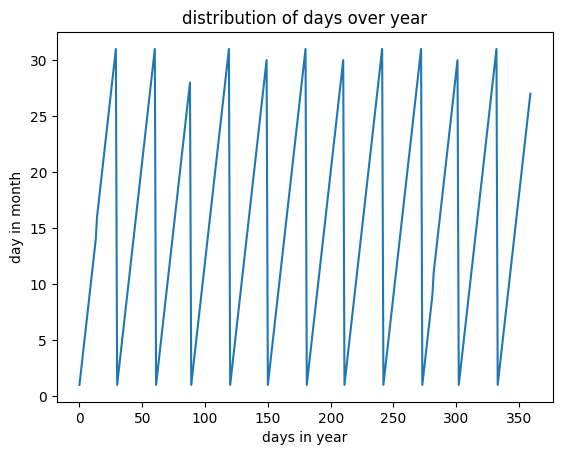

In [12]:
section = df[:360]
x = section['day']
plt.plot(x)
plt.xlabel("days in year")
plt.ylabel("day in month")
plt.title("distribution of days over year")
plt.show()

the code is generating a scatter plot to visualize the cyclic encoding of months using the sine and cosine transformed values. The x-axis represents the sine encoded months, the y-axis represents the cosine encoded months, and each data point represents a specific month in the dataset

Text(0, 0.5, 'cos encoded months ')

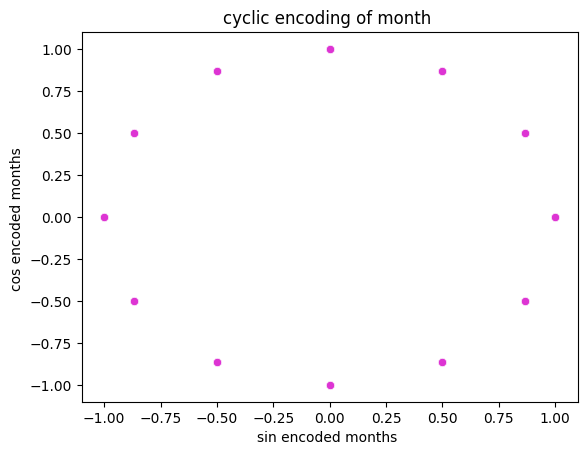

In [13]:
ax = sns.scatterplot(x = df['month_sin'], y = df['month_cos'], data = df, color = "#DD34D3")
ax.set_title("cyclic encoding of month ")
ax.set_xlabel("sin encoded months ")
ax.set_ylabel("cos encoded months ")

Text(0, 0.5, 'cos encoded day')

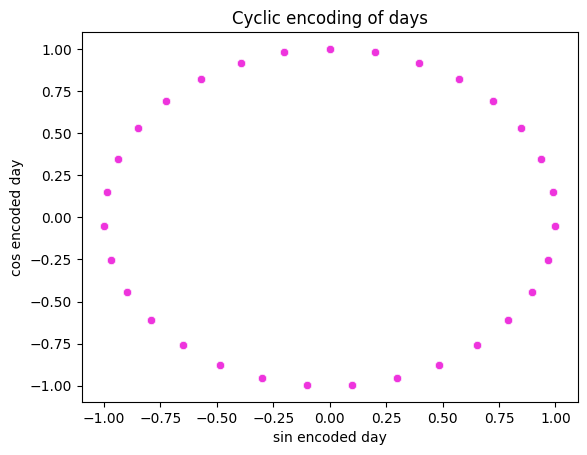

In [14]:
ax = sns.scatterplot(x = df['day_sin'], y = df['day_cos'], data = df, color = '#EE34DD')
ax.set_title("Cyclic encoding of days")
ax.set_xlabel("sin encoded day")
ax.set_ylabel("cos encoded day")

In [15]:
s = (df.dtypes == 'object')            #returns the series of 0 and 1 representing weather a col is object data type.
str_cols = list(s[s].index)            # create the list of name of columns which have object data type s[s] filters s on the basis of true values
print("object or categorical columns are :" + '\n', str_cols)


object or categorical columns are :
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
#checking the missing values in categories:
for i in str_cols:
  print(i, df[i].isnull().sum())


Location 0
WindGustDir 4714
WindDir9am 4471
WindDir3pm 1951
RainToday 575
RainTomorrow 1


In [17]:
from pandas.core.dtypes.cast import soft_convert_objects
#filling the missing values in place of null in each column with the mode of column
for i in str_cols:
  df[i].fillna(df[i].mode()[0], inplace = True)
  print(df[i].isnull().sum())

0
0
0
0
0
0


--- so now their is no null values in the object data type columns

In [18]:
n = (df.dtypes == 'float64')
numerical_cols = list(n[n].index)         #getting the list of columns containing the numerical data type
print(numerical_cols)

#filling the missing values of numerical data type columns with the median of columns

for i in numerical_cols:
  df[i].fillna(df[i].median(), inplace = True)
  print(i, df[i].isnull().sum())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'day_sin', 'day_cos', 'month_sin', 'month_cos']
MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
RISK_MM 0
day_sin 0
day_cos 0
month_sin 0
month_cos 0


---so now their are no null values in the columns of numerical datatype.

plotting the variation of mean rainfall over years

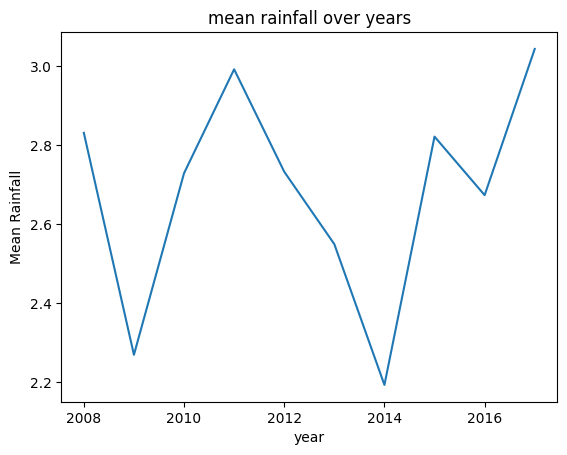

In [19]:
Y = df.groupby('year')['Rainfall'].mean()
X = df.groupby("year")['year'].mean()
plt.plot(X , Y)
plt.title('mean rainfall over years')
plt.xlabel('year')
plt.ylabel('Mean Rainfall')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


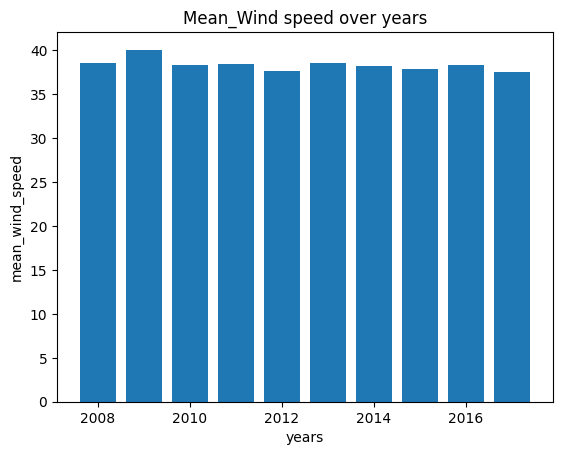

In [20]:
mean_wind_speed = df.groupby('year')['WindGustSpeed'].mean()
year = df.groupby('year')["year"].unique()
plt.bar( year, mean_wind_speed)
plt.title("Mean_Wind speed over years")
plt.xlabel("years")
plt.ylabel("mean_wind_speed")
plt.show()

label_encoder = LabelEncoder(): This line creates an instance of the LabelEncoder class from the scikit-learn library. The LabelEncoder is used to encode categorical variables into numerical labels.

for i in object_cols:: This line sets up a loop that iterates over each column name stored in the object_cols variable. It assumes that object_cols is a list containing the names of columns in the DataFrame that contain categorical data.

data[i] = label_encoder.fit_transform(data[i]): For each column i in the loop, the fit_transform method of the LabelEncoder is applied to the corresponding column data[i]. The fit_transform method first fits the encoder to the unique values in data[i] and then transforms those values into numerical labels. The resulting labels are assigned back to the data[i] column, effectively replacing the original categorical values with their encoded numerical counterparts.

By applying the label encoder in this manner, you can convert categorical variables into numerical labels, allowing you to use them as input for various machine learning algorithms that require numeric data.

**Label encoding columns with categorical data
Perform the scaling of the features
Detecting outliers
Dropping the outliers based on data analysis**

In [21]:
label_encoder = LabelEncoder()
for i in str_cols:
  df[i] = label_encoder.fit_transform(df[i])
df.info()

# checking the slice of column RainTomorrow
df.loc[10:20,'RainTomorrow']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42191 entries, 0 to 42190
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           42191 non-null  datetime64[ns]
 1   Location       42191 non-null  int64         
 2   MinTemp        42191 non-null  float64       
 3   MaxTemp        42191 non-null  float64       
 4   Rainfall       42191 non-null  float64       
 5   Evaporation    42191 non-null  float64       
 6   Sunshine       42191 non-null  float64       
 7   WindGustDir    42191 non-null  int64         
 8   WindGustSpeed  42191 non-null  float64       
 9   WindDir9am     42191 non-null  int64         
 10  WindDir3pm     42191 non-null  int64         
 11  WindSpeed9am   42191 non-null  float64       
 12  WindSpeed3pm   42191 non-null  float64       
 13  Humidity9am    42191 non-null  float64       
 14  Humidity3pm    42191 non-null  float64       
 15  Pressure9am    4219

10    1
11    1
12    1
13    0
14    0
15    1
16    1
17    0
18    0
19    0
20    0
Name: RainTomorrow, dtype: int64

In [22]:
#getting the features and the targets from the dataframe
features = df.drop(['RainTomorrow','Date', 'day', 'month'], axis = 1)
target = df['RainTomorrow']

features
target
cols = list(features.columns)

list(features.columns): This line creates a list containing the column names of the features DataFrame. It is used to preserve the column names for later use.

The StandardScaler is a preprocessing transformer that scales the input features to have zero mean and unit variance.

fit_transform(features):fit_transform is a method of the StandardScaler applied on the features DataFrame.
The fit_transform method fits the scaler to the data and then transforms the features by subtracting the mean and dividing by the standard deviation. This step standardizes the features and makes them have zero mean and unit variance.

new_features = pd.DataFrame(scaler_features, columns=list(features.columns)):
After scaling the features, this line creates a new DataFrame called new_features using the scaled values. The pd.DataFrame function is used to convert the scaled features, which are currently in NumPy array format, back into a DataFrame. The columns parameter is set to col_names to assign the original column names to the newly created DataFrame.


In [23]:
#scaling the features
features = preprocessing.StandardScaler().fit_transform(features) # returns nD array need to convert into dataframe
features = pd.DataFrame( features, columns = cols)
features.drop('RISK_MM', axis = 1)
features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,year,day_sin,day_cos,month_sin,month_cos
0,-1.615623,0.047376,-0.154432,-0.218715,-0.158524,0.179965,1.235195,0.427271,1.053895,1.503840,...,0.171441,-0.142153,-0.095357,-0.534457,-0.286404,-1.832986,0.278421,1.423556,-0.020665,1.439729
1,-1.615623,-0.989875,0.211614,-0.283012,-0.158524,0.179965,1.450558,0.427271,-0.471876,1.722973,...,0.171441,-0.086432,0.336467,-0.534457,-0.286404,-1.832986,0.549190,1.337139,-0.020665,1.439729
2,-1.615623,-0.039062,0.311445,-0.283012,-0.158524,0.179965,1.665920,0.580634,1.053895,1.722973,...,-1.244167,0.619358,0.146464,-0.534457,-0.286404,-1.832986,0.797315,1.197046,-0.020665,1.439729
3,-1.615623,-0.678700,0.694129,-0.283012,-0.158524,0.179965,-0.703069,-1.106360,0.182026,-1.564016,...,0.171441,0.080728,0.716471,-0.534457,-0.179844,-1.832986,1.012637,1.009013,-0.020665,1.439729
4,-1.615623,0.756164,1.409583,-0.175850,-0.158524,0.179965,1.235195,0.197226,-1.561712,-0.030088,...,1.587050,0.025008,1.269205,-0.534457,-0.265092,-1.832986,1.186342,0.780738,-0.020665,1.439729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42186,1.799995,0.081951,-0.770055,-0.283012,-0.158524,0.179965,1.665920,-1.643131,0.835928,-0.687486,...,1.587050,0.099302,-0.578999,-0.534457,-0.243780,-0.651287,0.549190,1.337139,0.687660,-1.196235
42187,1.799995,0.272114,-0.853248,-0.240147,-0.158524,0.179965,0.804470,1.040723,0.835928,0.846443,...,1.587050,-0.327887,-0.769001,-0.534457,-0.286404,-0.651287,0.797315,1.197046,0.687660,-1.196235
42188,1.799995,0.254826,-0.753417,-0.283012,-0.158524,0.179965,0.804470,0.043863,0.617960,0.627310,...,0.171441,-0.142153,-0.596272,-0.534457,-0.286404,-0.651287,1.012637,1.009013,0.687660,-1.196235
42189,1.799995,0.030088,-1.086186,-0.283012,-0.158524,0.179965,0.158381,1.347449,0.617960,0.189045,...,1.587050,-0.327887,-1.010822,-0.534457,-0.286404,-0.651287,1.186342,0.780738,0.687660,-1.196235


In [24]:
#checking the statistical values of features
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,42191.0,1.293396e-16,1.000012,-1.615623,-0.883705,0.092186,0.824104,1.799995
MinTemp,42191.0,2.519428e-16,1.000012,-3.098952,-0.730562,0.099238,0.808026,2.865241
MaxTemp,42191.0,3.637677e-17,1.000012,-2.916416,-0.736778,-0.087878,0.610937,3.905351
Rainfall,42191.0,3.705041e-18,1.000012,-0.283012,-0.283012,-0.283012,-0.218715,39.474018
Evaporation,42191.0,-1.919885e-17,1.000012,-1.539806,-0.218580,-0.158524,-0.098468,42.000612
Sunshine,42191.0,-4.459523e-16,1.000012,-3.323032,0.179965,0.179965,0.179965,2.354238
WindGustDir,42191.0,2.627211e-17,1.000012,-1.564520,-0.703069,-0.056981,0.804470,1.665920
WindGustSpeed,42191.0,2.667630e-16,1.000012,-2.409946,-0.646271,-0.109500,0.427271,7.405291
WindDir9am,42191.0,9.161557e-17,1.000012,-1.779679,-0.907810,0.182026,0.835928,1.489829
WindDir3pm,42191.0,9.119454e-17,1.000012,-1.564016,-0.687486,-0.030088,0.846443,1.722973


colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]: This line defines a list of colors that will be used to color the boxes in the boxen plot.

plt.figure(figsize=(20,10)): This line creates a new figure with a specified size (width: 20 units, height: 10 units) for the plot.

sns.boxenplot(data=new_features, palette=colours): This line creates a boxen plot using the seaborn library. The data parameter is set to the new_features DataFrame, which contains the scaled features. The palette parameter is set to colours to specify the colors for the boxes in the plot.

plt.xticks(rotation=90): This line rotates the x-axis tick labels by 90 degrees to avoid overlapping if the feature names are long.

plt.show(): This line displays the plot on the screen.
By examining the boxen plot, we can gain insights into the distribution and potential outliers in the data for each feature in the new_features DataFrame.

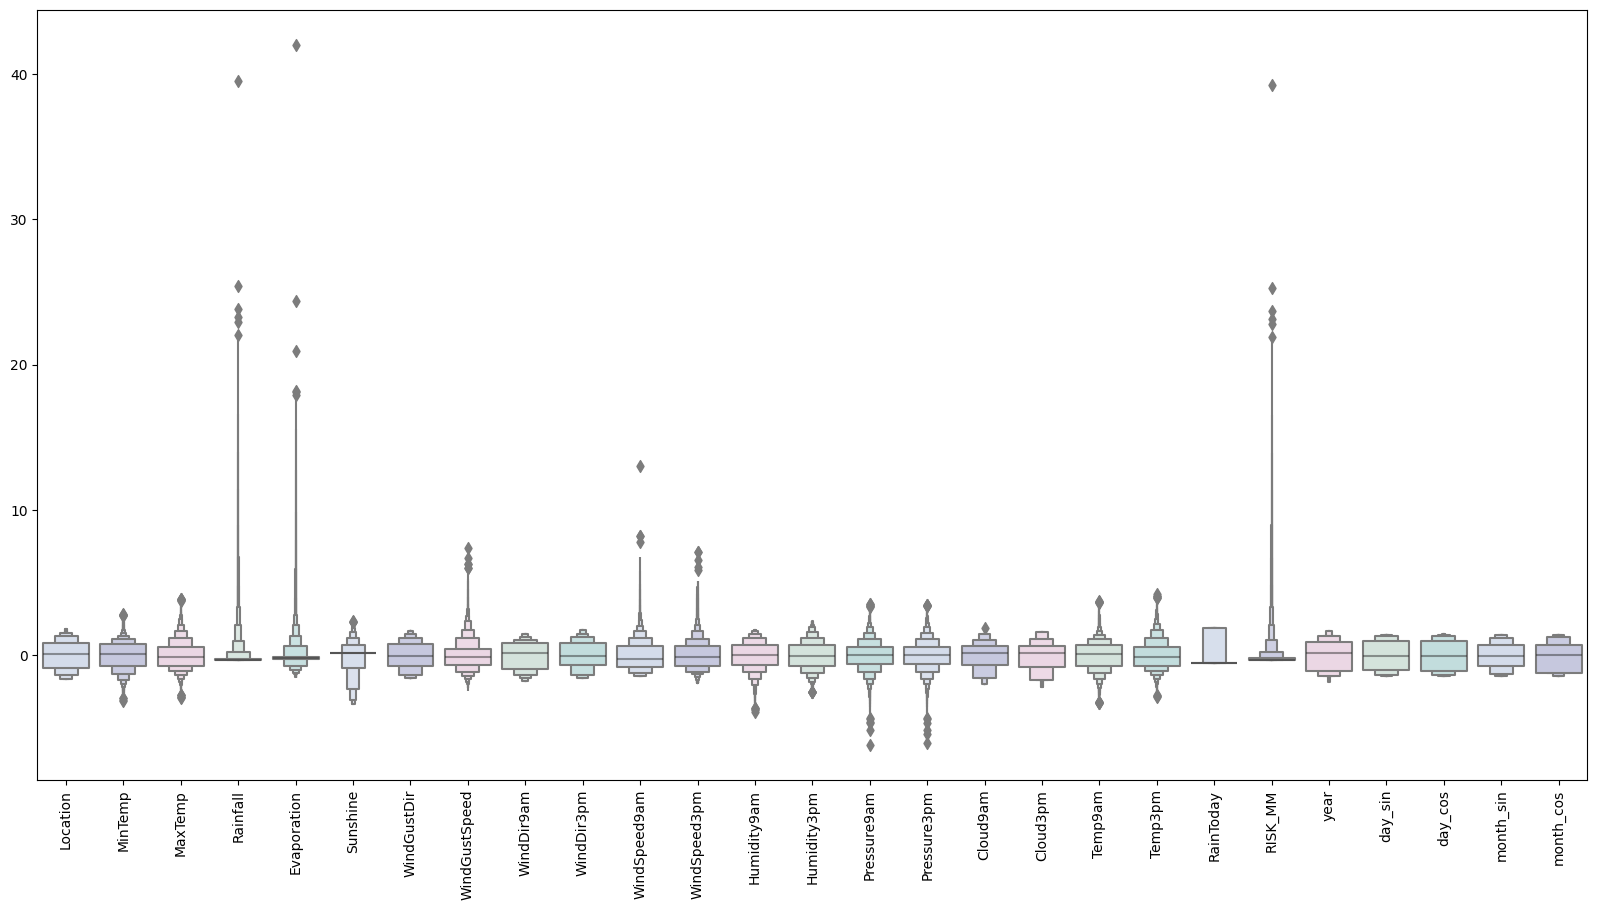

In [25]:
#Detecting outliers by looking at the features
#creating the boxen plot of the features dataframe
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize = (20,10))
sns.boxenplot( data = features, palette = colours)
plt.xticks(rotation = 90)
plt.show()

filtering the features DataFrame to remove rows that contain outlier values for specific columns

In [26]:
# dropping with outlier
# removing the rows of dataframe that contain outlier

features['RainTommorow'] = target
features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

features.describe().T
features




,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,RISK_MM,year,day_sin,day_cos,month_sin,month_cos,RainTommorow
0,-1.615623,0.047376,-0.154432,-0.218715,-0.158524,0.179965,1.235195,0.427271,1.053895,1.503840,...,-0.142153,-0.095357,-0.534457,-0.286404,-1.832986,0.278421,1.423556,-0.020665,1.439729,0
1,-1.615623,-0.989875,0.211614,-0.283012,-0.158524,0.179965,1.450558,0.427271,-0.471876,1.722973,...,-0.086432,0.336467,-0.534457,-0.286404,-1.832986,0.549190,1.337139,-0.020665,1.439729,0
2,-1.615623,-0.039062,0.311445,-0.283012,-0.158524,0.179965,1.665920,0.580634,1.053895,1.722973,...,0.619358,0.146464,-0.534457,-0.286404,-1.832986,0.797315,1.197046,-0.020665,1.439729,0
3,-1.615623,-0.678700,0.694129,-0.283012,-0.158524,0.179965,-0.703069,-1.106360,0.182026,-1.564016,...,0.080728,0.716471,-0.534457,-0.179844,-1.832986,1.012637,1.009013,-0.020665,1.439729,0
4,-1.615623,0.756164,1.409583,-0.175850,-0.158524,0.179965,1.235195,0.197226,-1.561712,-0.030088,...,0.025008,1.269205,-0.534457,-0.265092,-1.832986,1.186342,0.780738,-0.020665,1.439729,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42186,1.799995,0.081951,-0.770055,-0.283012,-0.158524,0.179965,1.665920,-1.643131,0.835928,-0.687486,...,0.099302,-0.578999,-0.534457,-0.243780,-0.651287,0.549190,1.337139,0.687660,-1.196235,0
42187,1.799995,0.272114,-0.853248,-0.240147,-0.158524,0.179965,0.804470,1.040723,0.835928,0.846443,...,-0.327887,-0.769001,-0.534457,-0.286404,-0.651287,0.797315,1.197046,0.687660,-1.196235,0
42188,1.799995,0.254826,-0.753417,-0.283012,-0.158524,0.179965,0.804470,0.043863,0.617960,0.627310,...,-0.142153,-0.596272,-0.534457,-0.286404,-0.651287,1.012637,1.009013,0.687660,-1.196235,0
42189,1.799995,0.030088,-1.086186,-0.283012,-0.158524,0.179965,0.158381,1.347449,0.617960,0.189045,...,-0.327887,-1.010822,-0.534457,-0.286404,-0.651287,1.186342,0.780738,0.687660,-1.196235,0


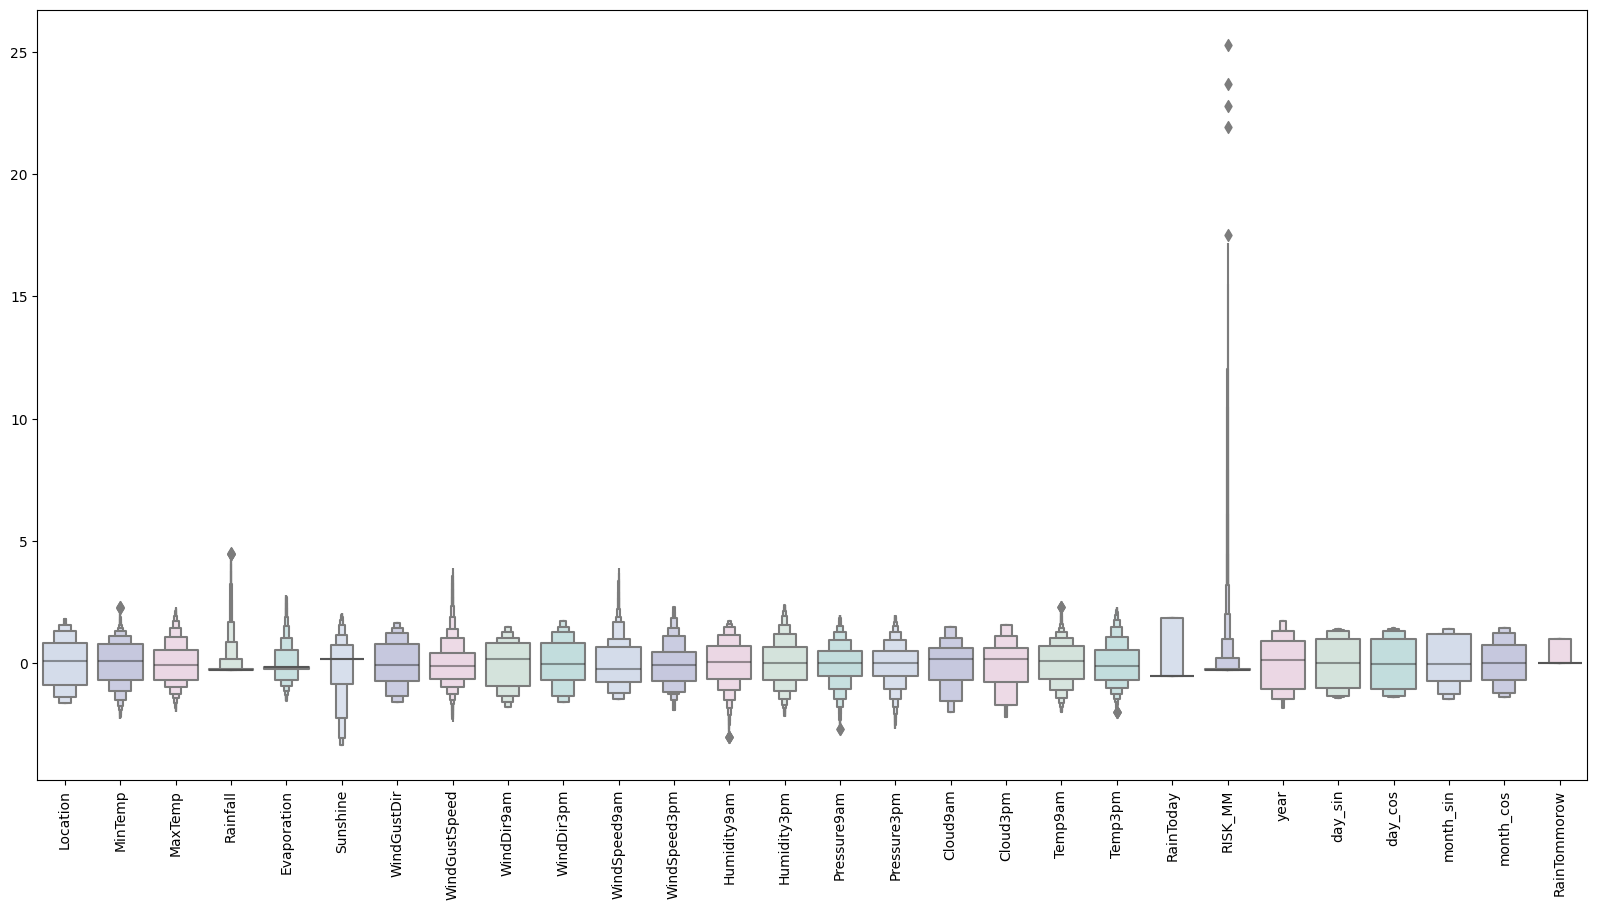

In [28]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

from above boxplot the data has now good distribution for each coresspoinding feature.

**Model Building**

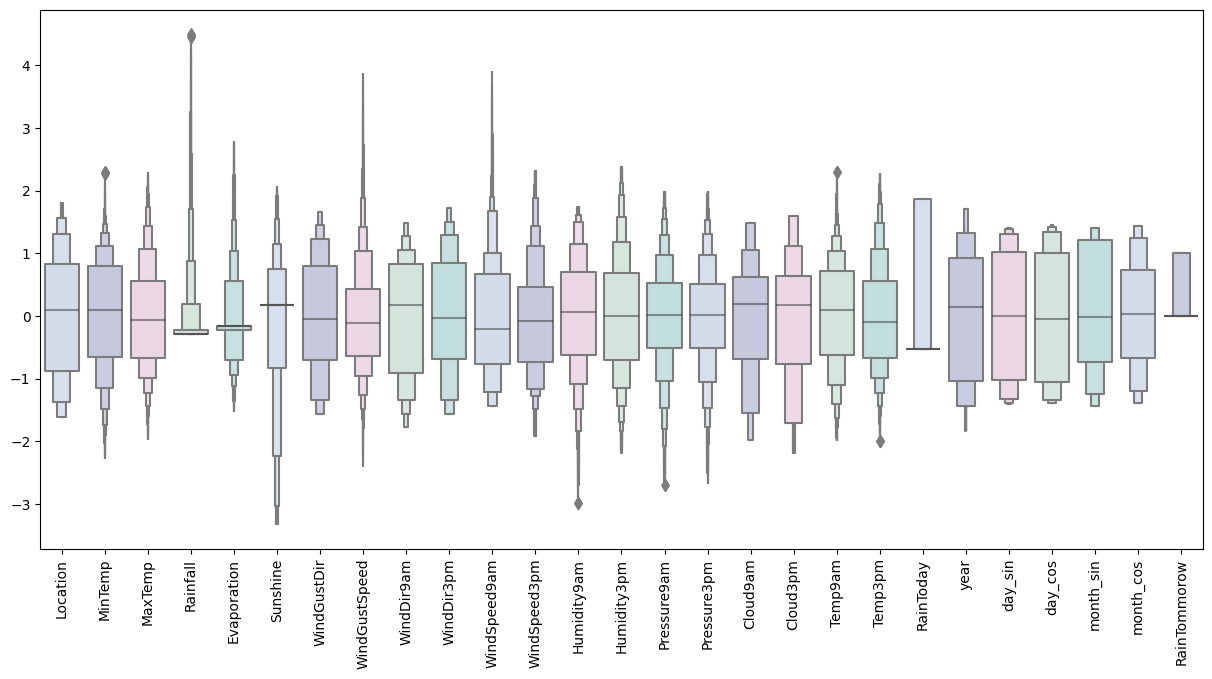

In [53]:
#features = features.drop(['RISK_MM'], axis = 1)
plt.figure(figsize = (15,7))
sns.boxenplot(data = features, palette = colours)
plt.xticks(rotation = 90)
plt.show()


**Splitting test and training sets**

In [58]:
X = features.drop(["RainTommorow"], axis = 1)
Y = features["RainTommorow"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X.shape

(36284, 26)

**model training and compiling**

In [59]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
726/726 [==============================] - 3s 2ms/step - loss: 0.5860 - accuracy: 0.7782 - val_loss: 0.4341 - val_accuracy: 0.7689
Epoch 2/150
726/726 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.7784 - val_loss: 0.4205 - val_accuracy: 0.7689
Epoch 3/150
726/726 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.7784 - val_loss: 0.4148 - val_accuracy: 0.7689
Epoch 4/150
726/726 [==============================] - 1s 1ms/step - loss: 0.4197 - accuracy: 0.7784 - val_loss: 0.4109 - val_accuracy: 0.7689
Epoch 5/150
726/726 [==============================] - 1s 1ms/step - loss: 0.4164 - accuracy: 0.7784 - val_loss: 0.4087 - val_accuracy: 0.7689
Epoch 6/150
726/726 [==============================] - 1s 1ms/step - loss: 0.4147 - accuracy: 0.7784 - val_loss: 0.4068 - val_accuracy: 0.7689
Epoch 7/150
726/726 [==============================] - 1s 1ms/step - loss: 0.4144 - accuracy: 0.7784 - val_loss: 0.4049 - val_accuracy: 0.7689

**Plotting training and validation loss over epochs**

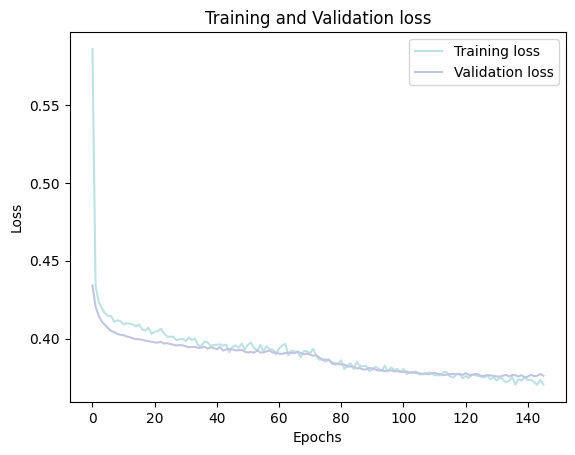

In [60]:

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

**Plotting training and validation accuracy over epochs**

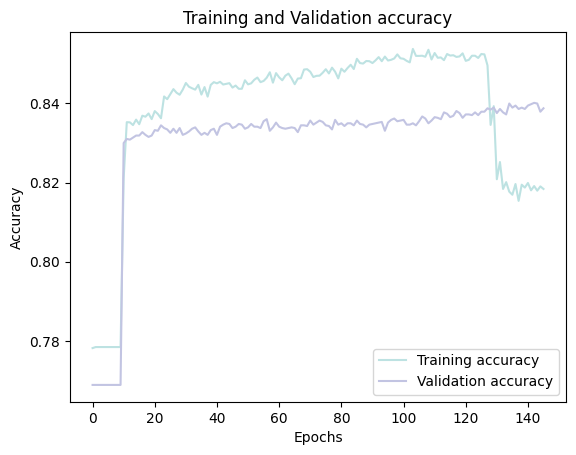

In [61]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()